## Import necessary packages

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso
import statsmodels.api as sm
from statsmodels.multivariate.pca import PCA
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from icl_lens_sizing.preprocessing.preprocessing import load_and_prepare_training_data

## Load and prepare ICL data

In [8]:
features = ["implantat_größe",'ACD','AtA', 'ACW', 'ARtAR_LR', 'StS', 'StS_LR', 'CBID',
       'CBID_LR']
custom_features = {'key':'cbid_ratio', 'func':lambda row: row['CBID_LR']/row['CBID_LR']}
X_train, y_train, X_validation, y_validation, feature_mapping = load_and_prepare_training_data(path='../data/icl_data_2023-07-09.csv', target="Lens-ICPL-Distance",
                                                                                               features=features, test_size=0.2, custom_features=custom_features)


TypeError: load_and_prepare_training_data() got an unexpected keyword argument 'path'

## Prepare dataframe for regression

In [9]:
pd.read_csv("../data/icl_data_2023-07-09.csv", sep=";", decimal=',').columns

Index(['befund_id', 'geschlecht', 'alter', 'auge', 'implantat_name',
       'implantat_größe', 'Lens-ICPL-Distance', 'ACD', 'ACA_nasal',
       'ACA_temporal', 'AtA', 'ACW', 'ARtAR_LR', 'StS', 'StS_LR', 'CBID',
       'CBID_LR', 'mPupil', 'WtW_MS-39', 'WtW_IOL_Master', 'Sphaere',
       'Zylinder', 'Achse'],
      dtype='object')

In [57]:

# ['alter', 'ACD', 'ACA_nasal',
#        'ACA_temporal', 'AtA', 'ACW', 'ARtAR_LR', 'StS', 'StS_LR', 'CBID',
#        'CBID_LR', 'mPupil', 'WtW_IOL_Master', 'Sphaere',
#        'Zylinder','geschlecht_m', 'geschlecht_w',
#        'implantat_größe_12.5', 'implantat_größe_12.75', 'implantat_größe_13.0',
#        'implantat_größe_13.25', 'implantat_größe_13.5',
#        'implantat_größe_13.75']

In [63]:
X_train, y_train, X_validation, y_validation, feature_mapping = load_and_prepare_data(
    target="Lens-ICPL-Distance", features=features)
X_ols = sm.add_constant(X_train, has_constant='add')
est = sm.OLS(y_train, X_ols).fit()
X_prime = sm.add_constant(X_validation, has_constant='add')
pred = est.predict(X_prime)

In [64]:
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     Lens-ICPL-Distance   R-squared:                       0.504
Model:                            OLS   Adj. R-squared:                  0.403
Method:                 Least Squares   F-statistic:                     4.984
Date:                Mon, 10 Jul 2023   Prob (F-statistic):           5.72e-05
Time:                        18:01:08   Log-Likelihood:                -381.30
No. Observations:                  60   AIC:                             784.6
Df Residuals:                      49   BIC:                             807.6
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        551.7667     19.888     27.744      0.000     511.801     591.733
x1            -5.2727     38.948     -0.135      0.893     -83.542      72.996
x2            56.3947     26.154      2.156      0.036       3.836     108.953
x3           -72.0959     48.549     -1.485      0.144    -169.659      25.467
x4            32.2420     33.444      0.964      0.340     -34.966      99.450
x5           -26.9809     38.878     -0.694      0.491    -105.110      51.148
x6           -13.8004     41.343     -0.334      0.740     -96.882      69.281
x7           -16.9540     23.325     -0.727      0.471     -63.828      29.920
x8           -44.5875     50.710     -0.879      0.384    -146.492      57.317
x9           132.5426    137.159      0.966      0.339    -143.089     408.174
x10          127.0337    128.437      0.989      0.327    -131.071     385.138
==============================================================================
Omnibus:                       13.065   Durbin-Watson:                   2.295
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               15.259
Skew:                           0.907   Prob(JB):                     0.000486
Kurtosis:                       4.678   Cond. No.                         18.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [65]:
feature_mapping

{0: 'Lens-ICPL-Distance',
 1: 'implantat_größe',
 2: 'ACD',
 3: 'AtA',
 4: 'ACW',
 5: 'ARtAR_LR',
 6: 'StS',
 7: 'StS_LR',
 8: 'CBID',
 9: 'CBID_LR',
 10: 'cbid_ratio'}

In [61]:
model_lasso = Lasso()
cross_val_score(model_lasso, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')

array([-149.31789834, -128.96383482, -100.23359721, -121.40166755,
       -153.98554198])

<Axes: >

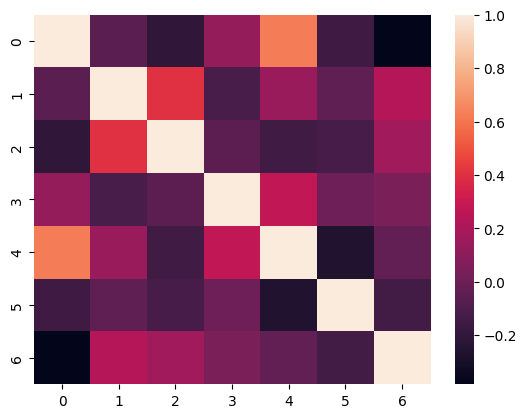

In [71]:
df = pd.DataFrame(X_train)

sns.heatmap(df.corr())

## Train univariate linear regression with statsmodels

In [8]:
X_ols = sm.add_constant(X_train, has_constant='add')
est = sm.OLS(y_train, X_ols).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.739
Model:                            OLS   Adj. R-squared:                  0.617
Method:                 Least Squares   F-statistic:                     6.024
Date:                Fri, 12 May 2023   Prob (F-statistic):           5.74e-06
Time:                        12:27:35   Log-Likelihood:                -308.10
No. Observations:                  51   AIC:                             650.2
Df Residuals:                      34   BIC:                             683.0
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        579.6667     17.445     33.228      0.000     544.214     615.120
x1            74.5593     45.063      1.655      0.107     -17.019     166.137
x2            10.9919     34.263      0.321      0.750     -58.639      80.623
x3            17.2260     26.784      0.643      0.524     -37.206      71.658
x4             0.7969     28.280      0.028      0.978     -56.675      58.269
x5           -25.3409     64.614     -0.392      0.697    -156.653     105.971
x6           -21.2814     64.332     -0.331      0.743    -152.021     109.458
x7           -55.2766     40.218     -1.374      0.178    -137.009      26.456
x8           -66.7627     52.208     -1.279      0.210    -172.862      39.337
x9            11.6920     24.548      0.476      0.637     -38.196      61.580
x10          -63.9257     50.283     -1.271      0.212    -166.114      38.263
x11           63.4656     32.944      1.926      0.062      -3.484     130.416
x12           61.9619     30.653      2.021      0.051      -0.333     124.257
x13           50.0049     61.316      0.816      0.420     -74.605     174.615
x14          -16.4765     36.331     -0.454      0.653     -90.309      57.356
x15           24.1513     14.750      1.637      0.111      -5.824      54.127
x16           14.2205     19.648      0.724      0.474     -25.709      54.150
x17           25.6563     14.192      1.808      0.079      -3.185      54.498
==============================================================================
Omnibus:                        4.350   Durbin-Watson:                   2.129
Prob(Omnibus):                  0.114   Jarque-Bera (JB):                3.512
Skew:                           0.399   Prob(JB):                        0.173
Kurtosis:                       4.008   Cond. No.                     1.54e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.29e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

## Validate univariate linear regression model

In [9]:
X_prime = sm.add_constant(X_validation, has_constant='add')
pred = est.predict(X_prime)

column_names = {0:'prediction', 1:'truth'}
df_validation = pd.DataFrame([pred, y_validation]).transpose().rename(columns=column_names)
df_validation["delta"] = df_validation["prediction"] - df_validation["truth"]
print(df_validation.head(10))
df_validation['delta'].abs().sum()/10

   prediction  truth       delta
0  502.527210  489.0   13.527210
1  373.497176  455.0  -81.502824
2  696.091706  558.0  138.091706
3  539.399702  387.0  152.399702
4  543.152296  546.0   -2.847704
5  539.489170  579.0  -39.510830
6  531.137962  562.0  -30.862038
7  648.793730  446.0  202.793730
8  733.735864  871.0 -137.264136
9  604.202060  638.0  -33.797940


158.53076844893008

## Train LASSO regression model

In [10]:
model_lasso = Lasso()
model_lasso.fit(X_train, y_train)

Lasso()

In [11]:
preds = model_lasso.predict(X_validation)
column_names = {0:'prediction', 1:'truth'}
df_validation = pd.DataFrame([preds, y_validation]).transpose().rename(columns=column_names)
df_validation["delta"] = df_validation["prediction"] - df_validation["truth"]
print(df_validation.head(10))
df_validation['delta'].abs().sum()/10

   prediction  truth       delta
0  517.872574  489.0   28.872574
1  358.772052  455.0  -96.227948
2  679.981963  558.0  121.981963
3  501.403280  387.0  114.403280
4  559.453052  546.0   13.453052
5  598.853977  579.0   19.853977
6  533.705682  562.0  -28.294318
7  625.875751  446.0  179.875751
8  723.490446  871.0 -147.509554
9  599.008538  638.0  -38.991462


153.5815152490869

## Problem data skewness

We have only one example which has a vault smaller than 500. Hence we will strongly 
over estimate these cases

In [12]:
df[df["ICL-Size"]==13.75]

,Vault,ICL-Size,ACD,ACA nasal,ACA temporal,AtA,ACW,ARtARLR,StS,StS LR,CBID,CBID LR,mPupil,WtW MS-39,WtW IOL Master,Sphäre,Zylinder,Sphärisches Äquivalent
69,1016,13.75,3.154,26.983,26.467,12.685,12.454,383.0,12.169,612.00,10.964,1.089,7.02,12.9,12.54,5.25,-1.0,4.75
68,853,13.75,3.098,25.640,25.000,12.740,12.452,442.0,12.260,676.00,10.985,1.144,6.86,12.9,12.40,5.50,-1.0,5.00
60,64,13.75,2.859,34.025,32.850,13.211,12.436,865.0,13.056,1.13,11.861,1.615,6.37,12.7,12.08,-16.25,-2.0,-17.25


## New Test Data

In [13]:
pd.read_csv("./Geplante-ICL-Table-2.csv",sep=";" ,header = 0).iloc[18:26]

FileNotFoundError: [Errno 2] No such file or directory: './Geplante-ICL-Table-2.csv'

In [ ]:
# Load data from csv sheet
df_test = pd.read_csv("./Geplante-ICL-Table-2.csv", sep=";", header = 0).iloc[18:26]

# Drop artificial column
df_test = df_test.drop(columns = ['ICL'])
df_test = df_test.dropna()

feat_map = {}
for i,col in enumerate(df.columns[2:18]):
        feat_map[i+1] = col
print(feat_map)

In [ ]:
def create_signed_data_frames(df_dict: dict, selectors: list) -> dict:
    
    if not selectors:
        
        return df_dict
    
    else:
        sel = selectors.pop(0)
        df_dict_suc  = creator_helper(df_dict, sel)
        
        return create_signed_data_frames(df_dict_suc, selectors)
    
    
    
def creator_helper(df_dict_2, sel):
    
    df_dictus = {}
    for key, df in df_dict_2.items():
        
        identifiers = df[sel].unique()
        for ident in identifiers:

            df_dictus[f"{key}_{sel}_{ident}"] = df[df[sel]==ident].drop(columns = sel)
        
    return df_dictus

def prepare_dfs_for_pred(df_dict: dict, categorical_cols: list, feat_map: dict,
                         df_add: pd.DataFrame = None, to_array: bool = False,
                         get_dummies: bool = False):
    
    new_dict = {}
    for key, df in df_dict.items():
        
        for cat_col in categorical_cols:
            df = categorize(df, df_add, cat_col, feat_map, get_dummies)
            
        if to_array:
            new_dict[key] = df.values
        else:
            new_dict[key] = df
    
    return new_dict

def categorize(df, df_add, cat_col, feat_map, get_dummies):
    
    
    if df_add.empty:
        cats = df_add[f'{cat_col}'].unique()
    else:
        cats = df_add[cat_col].unique()
    
    cats = [str(c) for c in cats]
    n = len(cats)
    df = df.append([df]*(n-1),ignore_index=True)
    num_rows = df.shape[0]
    
    cat_rows = []
    for cat in cats:
        cat_rows.append([cat])
        
    df_cats = pd.DataFrame(cat_rows, columns=[cat_col])
    df_extended = pd.concat([df_cats, df], axis=1, ignore_index=True)
    df_extended = df_extended.rename(mapper=feat_map, axis=1)
    
    try:
        df_extended[cat_col] = df_extended[cat_col].astype(float)
    except:
        pass
    
    if get_dummies:
        df_extended[cat_col] = df_extended[cat_col].astype(str).astype('category')
        df_categorical = pd.get_dummies(df_extended,prefix='ICL-Size', columns=[cat_col])
    else:
        df_categorical = df_extended
    
    return df_categorical

def predict_ols_for_all_items(array_dict, model, cat_map):
    predictions = {}
    
    for key, value in array_dict.items():
        X = value.values
        X = sm.add_constant(value, has_constant='add')
        pred = model.predict(X)
        df = pd.DataFrame(data=pred).rename(mapper=cat_map, axis=0).rename(columns={0:key})
        predictions[key] = df
    
    predictions_df = pd.DataFrame()
    for key ,value in predictions.items():
        predictions_df = pd.concat([predictions_df, value], axis=1)
    
    return predictions_df

def predict_for_all_items(df_dict, model, cat_map):
    predictions = {}
    
    for key, value in df_dict.items():
        
        pred = model.predict(value)
        df = pd.DataFrame(data=pred).rename(mapper=cat_map, axis=0).rename(columns={0:key})
        predictions[key] = df
    
    predictions_df = pd.DataFrame()
    for key ,value in predictions.items():
        predictions_df = pd.concat([predictions_df, value], axis=1)
        
    return predictions_df

In [ ]:
selectors = ['Eye','ID']
df_dicti = create_signed_data_frames({'df': df_test}, selectors)

feat_map[0] = 'ICL-Size'
df_dict_ols = prepare_dfs_for_pred(df_dicti, ['ICL-Size'], feat_map, df[['ICL-Size']])

cat_map = {}
for i, cat in enumerate(df['ICL-Size'].unique()):
    cat_map[i] = cat

preds_ols = predict_ols_for_all_items(df_dict_ols, est, cat_map)

In [ ]:
preds_lasso = predict_for_all_items(df_dict_ols, model_lasso, cat_map)

In [ ]:
preds_lasso

In [41]:
preds_ols

,df_Eye_OD_ID_39204,df_Eye_OD_ID_36496,df_Eye_OD_ID_39010,df_Eye_OD_ID_39011,df_Eye_OS_ID_39204,df_Eye_OS_ID_36496,df_Eye_OS_ID_39010,df_Eye_OS_ID_39011
12.50,407.954397,292.411752,588.984755,708.648928,254.722704,489.903155,734.736407,529.176294
12.75,473.516803,357.974158,654.547161,774.211334,320.285110,555.465561,800.298813,594.738699
13.00,539.079209,423.536564,720.109567,839.773740,385.847516,621.027967,865.861218,660.301105
13.25,604.641614,489.098969,785.671973,905.336146,451.409922,686.590373,931.423624,725.863511
13.50,670.204020,554.661375,851.234379,970.898551,516.972328,752.152778,996.986030,791.425917
11.75,211.267180,95.724535,392.297538,511.961711,58.035487,293.215938,538.049189,332.489076


In [42]:
preds_ols.to_csv("preds_ols_20221101.csv")
preds_lasso.to_csv("preds_lasso_20221101.csv")

## Feature Engineering

In [30]:
#features = ['StS LR','mPupil']
X_train, y_train, X_validation, y_validation, df = load_and_prepare_data(validation_size=0)

{0: 'Vault', 1: 'ICL-Size', 2: 'ACD', 3: 'ACA nasal', 4: 'ACA temporal', 5: 'AtA', 6: 'ACW', 7: 'ARtARLR', 8: 'StS', 9: 'StS LR', 10: 'CBID', 11: 'CBID LR', 12: 'mPupil', 13: 'WtW MS-39', 14: 'WtW IOL Master', 15: 'Sphäre', 16: 'Zylinder', 17: 'Sphärisches Äquivalent'}
Data shape: (69, 17)


In [31]:
features = ['CBID LR', 'mPupil']
X_train, y_train, X_validation, y_validation, df = load_and_prepare_data(features=features,
                                                                         validation_size=0)
X_ols = sm.add_constant(X_train, has_constant='add')
est = sm.OLS(y_train, X_ols).fit()
est.summary()

{0: 'Vault', 1: 'ICL-Size', 2: 'CBID LR', 3: 'mPupil'}
Data shape: (70, 3)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.118
Model:                            OLS   Adj. R-squared:                  0.078
Method:                 Least Squares   F-statistic:                     2.938
Date:                Sat, 25 Feb 2023   Prob (F-statistic):             0.0396
Time:                        13:03:40   Log-Likelihood:                -460.29
No. Observations:                  70   AIC:                             928.6
Df Residuals:                      66   BIC:                             937.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        501.7578    702.469      0.714      0.478    -900.767    1904.283
x1           -14.1080     56.887     -0.248      0.805    -127.686      99.471
x2             0.1489      0.051      2.922      0.005       0.047       0.251
x3            34.4663     27.539      1.252      0.215     -20.516      89.449
==============================================================================
Omnibus:                        2.263   Durbin-Watson:                   1.163
Prob(Omnibus):                  0.322   Jarque-Bera (JB):                1.700
Skew:                           0.076   Prob(JB):                        0.427
Kurtosis:                       3.748   Cond. No.                     1.90e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.9e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [32]:
features = ['StS LR','CBID LR', 'mPupil']
X_train, y_train, X_validation, y_validation, df = load_and_prepare_data(features=features,
                                                                         validation_size=0)
X_ols = sm.add_constant(X_train, has_constant='add')
est = sm.OLS(y_train, X_ols).fit()
est.summary()

{0: 'Vault', 1: 'ICL-Size', 2: 'StS LR', 3: 'CBID LR', 4: 'mPupil'}
Data shape: (70, 4)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.131
Model:                            OLS   Adj. R-squared:                  0.078
Method:                 Least Squares   F-statistic:                     2.453
Date:                Sat, 25 Feb 2023   Prob (F-statistic):             0.0546
Time:                        13:03:53   Log-Likelihood:                -459.76
No. Observations:                  70   AIC:                             929.5
Df Residuals:                      65   BIC:                             940.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        361.4285    716.394      0.505      0.616   -1069.309    1792.166
x1           -10.2031     57.022     -0.179      0.859    -124.084     103.678
x2             0.1156      0.116      0.999      0.322      -0.116       0.347
x3             0.1787      0.059      3.026      0.004       0.061       0.297
x4            37.9446     27.759      1.367      0.176     -17.493      93.382
==============================================================================
Omnibus:                        1.688   Durbin-Watson:                   1.151
Prob(Omnibus):                  0.430   Jarque-Bera (JB):                1.190
Skew:                           0.311   Prob(JB):                        0.552
Kurtosis:                       3.146   Cond. No.                     2.30e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.3e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [33]:
features = ['StS LR', 'CBID', 'CBID LR', 'mPupil']
X_train, y_train, X_validation, y_validation, df = load_and_prepare_data(features=features,
                                                                         validation_size=0)
X_ols = sm.add_constant(X_train, has_constant='add')
est = sm.OLS(y_train, X_ols).fit()
est.summary()

{0: 'Vault', 1: 'ICL-Size', 2: 'StS LR', 3: 'CBID', 4: 'CBID LR', 5: 'mPupil'}
Data shape: (70, 5)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.471
Model:                            OLS   Adj. R-squared:                  0.429
Method:                 Least Squares   F-statistic:                     11.39
Date:                Sat, 25 Feb 2023   Prob (F-statistic):           7.02e-08
Time:                        13:04:06   Log-Likelihood:                -442.40
No. Observations:                  70   AIC:                             896.8
Df Residuals:                      64   BIC:                             910.3
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1308.3328    582.510      2.246      0.028     144.635    2472.030
x1           186.5091     54.347      3.432      0.001      77.939     295.079
x2             0.1191      0.091      1.308      0.196      -0.063       0.301
x3          -341.3623     53.265     -6.409      0.000    -447.770    -234.954
x4             0.2458      0.048      5.162      0.000       0.151       0.341
x5            87.6715     23.171      3.784      0.000      41.383     133.960
==============================================================================
Omnibus:                        0.554   Durbin-Watson:                   1.235
Prob(Omnibus):                  0.758   Jarque-Bera (JB):                0.337
Skew:                          -0.170   Prob(JB):                        0.845
Kurtosis:                       3.016   Cond. No.                     2.38e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.38e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [34]:
features = ['StS','StS LR', 'CBID', 'CBID LR', 'mPupil']
X_train, y_train, X_validation, y_validation, df = load_and_prepare_data(features=features,
                                                                         validation_size=0)
X_ols = sm.add_constant(X_train, has_constant='add')
est = sm.OLS(y_train, X_ols).fit()
est.summary()

{0: 'Vault', 1: 'ICL-Size', 2: 'StS', 3: 'StS LR', 4: 'CBID', 5: 'CBID LR', 6: 'mPupil'}
Data shape: (70, 6)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.527
Model:                            OLS   Adj. R-squared:                  0.482
Method:                 Least Squares   F-statistic:                     11.69
Date:                Sat, 25 Feb 2023   Prob (F-statistic):           9.31e-09
Time:                        13:04:12   Log-Likelihood:                -438.49
No. Observations:                  70   AIC:                             891.0
Df Residuals:                      63   BIC:                             906.7
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1347.1228    555.395      2.426      0.018     237.254    2456.992
x1           243.8599     55.901      4.362      0.000     132.151     355.568
x2          -193.6773     70.969     -2.729      0.008    -335.497     -51.858
x3             0.0342      0.092      0.371      0.712      -0.150       0.218
x4          -203.6578     71.579     -2.845      0.006    -346.697     -60.619
x5             0.2274      0.046      4.957      0.000       0.136       0.319
x6            96.1320     22.301      4.311      0.000      51.566     140.697
==============================================================================
Omnibus:                        1.288   Durbin-Watson:                   1.327
Prob(Omnibus):                  0.525   Jarque-Bera (JB):                0.771
Skew:                          -0.235   Prob(JB):                        0.680
Kurtosis:                       3.209   Cond. No.                     2.38e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.38e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [35]:
features = ['AtA', 'StS LR', 'CBID', 'CBID LR', 'mPupil']
X_train, y_train, X_validation, y_validation, df = load_and_prepare_data(features=features,
                                                                         validation_size=0)
X_ols = sm.add_constant(X_train, has_constant='add')
est = sm.OLS(y_train, X_ols).fit()
est.summary()

{0: 'Vault', 1: 'ICL-Size', 2: 'AtA', 3: 'StS LR', 4: 'CBID', 5: 'CBID LR', 6: 'mPupil'}
Data shape: (70, 6)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.561
Model:                            OLS   Adj. R-squared:                  0.519
Method:                 Least Squares   F-statistic:                     13.43
Date:                Sat, 25 Feb 2023   Prob (F-statistic):           9.69e-10
Time:                        13:04:20   Log-Likelihood:                -435.85
No. Observations:                  70   AIC:                             885.7
Df Residuals:                      63   BIC:                             901.4
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2089.9292    576.954      3.622      0.001     936.979    3242.879
x1           289.3856     57.473      5.035      0.000     174.534     404.237
x2          -253.0479     70.235     -3.603      0.001    -393.401    -112.695
x3             0.0641      0.085      0.755      0.453      -0.106       0.234
x4          -261.3091     53.698     -4.866      0.000    -368.615    -154.003
x5             0.2341      0.044      5.342      0.000       0.147       0.322
x6           104.7993     21.790      4.809      0.000      61.255     148.344
==============================================================================
Omnibus:                        0.002   Durbin-Watson:                   1.377
Prob(Omnibus):                  0.999   Jarque-Bera (JB):                0.076
Skew:                           0.001   Prob(JB):                        0.963
Kurtosis:                       2.838   Cond. No.                     2.56e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.56e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [36]:
features = ['AtA', 'StS LR', 'CBID', 'mPupil']
X_train, y_train, X_validation, y_validation, df = load_and_prepare_data(features=features,
                                                                         validation_size=0)
X_ols = sm.add_constant(X_train, has_constant='add')
est = sm.OLS(y_train, X_ols).fit()
est.summary()

{0: 'Vault', 1: 'ICL-Size', 2: 'AtA', 3: 'StS LR', 4: 'CBID', 5: 'mPupil'}
Data shape: (70, 5)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.362
Model:                            OLS   Adj. R-squared:                  0.313
Method:                 Least Squares   F-statistic:                     7.276
Date:                Sat, 25 Feb 2023   Prob (F-statistic):           1.89e-05
Time:                        13:04:24   Log-Likelihood:                -448.92
No. Observations:                  70   AIC:                             909.8
Df Residuals:                      64   BIC:                             923.3
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2509.0673    683.591      3.670      0.000    1143.437    3874.698
x1           257.6300     68.366      3.768      0.000     121.053     394.207
x2          -280.8635     83.766     -3.353      0.001    -448.205    -113.522
x3            -0.1619      0.088     -1.838      0.071      -0.338       0.014
x4          -195.2487     62.493     -3.124      0.003    -320.093     -70.404
x5            68.6952     24.775      2.773      0.007      19.202     118.188
==============================================================================
Omnibus:                        7.424   Durbin-Watson:                   1.215
Prob(Omnibus):                  0.024   Jarque-Bera (JB):                6.707
Skew:                          -0.695   Prob(JB):                       0.0350
Kurtosis:                       3.608   Cond. No.                     2.06e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.06e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [34]:
# Load data from csv sheet
df_test = pd.read_csv("./ICL2.csv", header = 2)

# Drop artificial column
df_test = df_test[['Eye','ID', 'AtA', 'StS LR', 'CBID', 'mPupil']]
df_test = df_test.dropna()

feat_map = {}
for i,col in enumerate(df.columns[2:14]):
        feat_map[i+1] = col
        
selectors = ['Eye','ID']
df_dicti = create_signed_data_frames({'df': df_test}, selectors)

feat_map[0] = 'ICL-Size'
df_dict_ols = prepare_dfs_for_pred(df_dicti, ['ICL-Size'], feat_map, df[['ICL-Size']])

cat_map = {}
for i, cat in enumerate(df['ICL-Size'].unique()):
    cat_map[i] = cat
    
preds_ols = predict_ols_for_all_items(df_dict_ols, est, cat_map)

/var/folders/qq/5y183fls14z16m7wr248wshc0000gn/T/ipykernel_6041/1994063929.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append([df]*(n-1),ignore_index=True)
/var/folders/qq/5y183fls14z16m7wr248wshc0000gn/T/ipykernel_6041/1994063929.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append([df]*(n-1),ignore_index=True)
/var/folders/qq/5y183fls14z16m7wr248wshc0000gn/T/ipykernel_6041/1994063929.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append([df]*(n-1),ignore_index=True)
/var/folders/qq/5y183fls14z16m7wr248wshc0000gn/T/ipykernel_6041/1994063929.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

In [35]:
preds_ols

,df_Eye_OD_ID_36905,df_Eye_OD_ID_35477,df_Eye_OD_ID_34561,df_Eye_OS_ID_36905,df_Eye_OS_ID_35477,df_Eye_OS_ID_34561,df_Eye_OS (nur ein Auge)_ID_37648
12.50,65.821787,232.502677,471.970222,-68.220731,146.868554,523.867398,293.561254
12.75,124.945213,291.626103,531.093648,-9.097305,205.991981,582.990824,352.684680
13.00,184.068639,350.749529,590.217074,50.026121,265.115407,642.114250,411.808106
13.25,243.192065,409.872955,649.340500,109.149547,324.238833,701.237676,470.931532
13.50,302.315491,468.996381,708.463927,168.272973,383.362259,760.361103,530.054959
11.75,-111.548492,55.132398,294.599944,-245.591009,-30.501724,346.497120,116.190976


In [31]:
pd.read_csv("./ICL2.csv", header = 2)[['AtA', 'StS LR', 'CBID', 'mPupil']]

,AtA,StS LR,CBID,mPupil
0,12.859,1.105,11.613,6.48
1,13.211,1.130,11.861,6.37
2,12.425,0.787,11.768,6.17
3,12.573,0.833,11.821,5.87
4,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN
6,12.578,0.560,11.247,4.94
7,11.698,0.877,11.032,6.22
8,11.970,0.709,10.890,6.22
9,NaN,NaN,NaN,5.78
